# Importing and defining

In [1]:
import pyadserver.simsep as simp
import numpy as np

# %%
# Define column
N = 41
L = 1
A_cros = np.pi*0.1**2
c1 = simp.column(L, A_cros, n_component=3, N_node = N)


# Definition of isotherm model

In [ ]:
def iso_fn(P,T):
    q1_re = []
    q2_re = []
    q3_re = []
    for ii in len(T):
        q1 = np.zeros_like(P[0])
        q2 = np.zeros_like(P[1])
        q3 = np.zeros_like(P[2])
        q1_re.append(q1)
        q2_re.append(q2)
        q3_re.append(q3)
    q1_res = np.array(q1_re)
    q2_res = np.array(q2_re)
    q3_res = np.array(q3_re)
    return [q1_res, q2_res, q3_res]

# Define other parameters

In [ ]:

### Sorbent prop
void_frac = 0.4     # (m^3/m^3)
D_particle = 0.01   # (m)
rho_solid =  1100   # (kg/m^3)
c1.adsorbent_info(iso_fn, void_frac, D_particle, rho_solid)

### Gas prop
M_molar = [0.016, 0.044, 0.018]         # (kg/mol)
mu_visco= [1.47E-5, 1.47E-5, 1.47E-5]   # (Pa sec)
c1.gas_prop_info(M_molar, mu_visco)

### Transfer prop
k_MTC  = [1E-4, 1E-4, 1E-4]     # m/sec
a_surf = 1
D_disp = [1E-6, 1E-6, 1E-6]     # m^2/sec
c1.mass_trans_info(k_MTC, a_surf, D_disp) 

dH_ad = [10E3, 10E3, 10E3]      # J/mol
Cp_solid = 935                  # J/kg/K
Cp_gas = [37.22, 29.15, 29.15]  # J/mol/K
h_heat = 100
c1.thermal_info(dH_ad, Cp_solid, Cp_gas, h_heat)


# Boundary conditions 
### (operating conditions)

In [ ]:
P_inlet = 11.0              # inlet pressure (bar)
y_inlet = [0, 0, 1]     # inlet mole fraction (mol/mol)
T_inlet = 300               # inlet temperature (K)
# Q_inlet = 0.2*A_cros*0.3  # volumetric flowrate (m^3/sec)
Cv_inlet = 0.02E-1             # inlet valve constant (m/sec/bar)

P_outlet = 10.0              # outlet pressure (bar)
Cv_outlet= 2.0E-1           # outlet valve constant (m/sec/bar)

Q_feed = 0.05*A_cros  # volumetric flowrate (m^3/sec)

c1.boundaryC_info(P_outlet, P_inlet, T_inlet, y_inlet,
                  Cv_inlet, Cv_outlet, 
                  Q_inlet = Q_feed,
                  assigned_v_option = True)

# Initial conditions 
### (Initial state variables of the column: C, q, T )

In [ ]:
P_init = 10.5*np.ones(N)    # (bar)
y_init = [0.5*np.ones(N), 0.5*np.ones(N), 0*np.ones(N)] # (mol/mol)
T_init = 300*np.ones(N)
q_init = iso_fn(P_init*np.array(y_init), T_init)

c1.initialC_info(P_init, T_init, T_init, y_init, q_init)

# Run breakthrough experiments

In [ ]:
c1.change_init_node(51)
# Number of node = 51
print(c1)
y_res, z_res, t_res = c1.run_mamoen(25,n_sec = 20, 
                                    CPUtime_print = True)

[[Current information included here]] 
Design          : True
adsorbent_info  : True
gas_prop_info   : True
mass_trans_info : True
thermal_info    : True
boundaryC_info  : True
initialC_info   : True
Flow direction  : Foward
Assigned velocity option: True

Simulation of this step is completed.
This took     2.377 mins to run. 



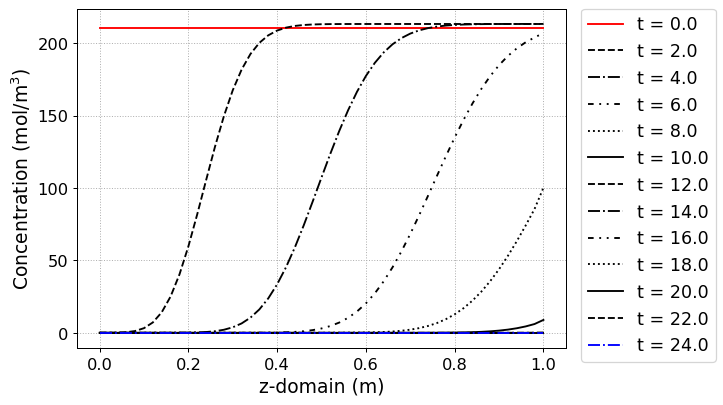

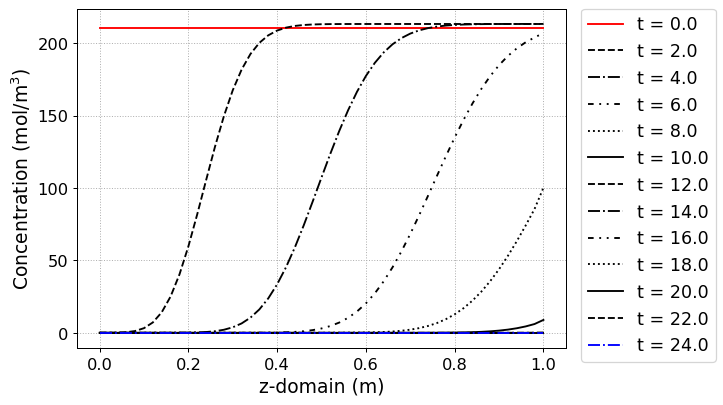

In [ ]:
fig = c1.Graph(2, 0, loc=[1.15,0.9], 
               yaxis_label = 'Concentration (mol/m$^3$)',
               file_name = 'C1.png')
fig = c1.Graph(2, 1, loc=[1.15,0.9], 
               yaxis_label = 'Concentration (mol/m$^3$)',
               file_name = 'C2.png')

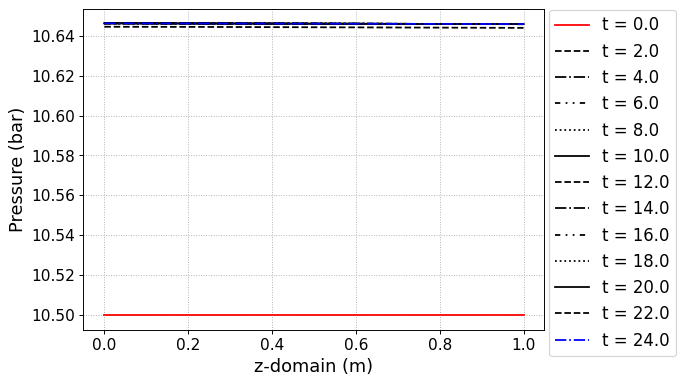

In [ ]:
fig, ax = c1.Graph_P(2, loc=[1.15,0.9])

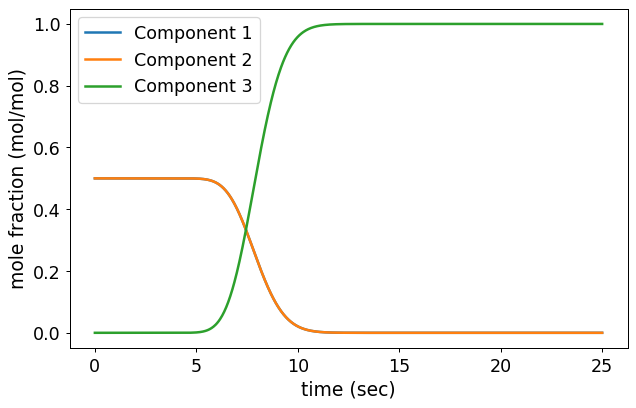

In [ ]:
bt = c1.breakthrough(True)

In [ ]:
t_pred = 8.0
print('At t = {0:2.1f} sec'.format(t_pred))
print('Comp 1 = ', bt[0](t_pred))
print('Comp 2 = ', bt[1](t_pred))
print('Comp 3 = ', bt[2](t_pred))

At t = 8.0 sec
Comp 1 =  0.23476611971625078
Comp 2 =  0.23476611971625083
Comp 3 =  0.5304677605674984
